U= 10010896
s= [2.81507887e+02 4.01858827e+01 2.98558620e+01 8.86721720e+00
 3.26711413e+00 2.52544189e-02]
Eigenvector: 
 [[-0.5522306  -0.23680754 -0.29135597  0.63737744 -0.38434487  0.01021129]
 [-0.40583172  0.40464166 -0.53031976 -0.55893088 -0.19636927 -0.19839878]
 [-0.53150608 -0.18439595  0.03803767 -0.01891533  0.81330378 -0.14223826]
 [-0.1239387   0.59202248  0.46726379  0.29844266 -0.06107964 -0.56834355]
 [-0.30782976 -0.49562214  0.53255403 -0.43537568 -0.38332921 -0.19872713]
 [-0.37111091  0.38736743  0.36121537 -0.04866696 -0.03978801  0.76012832]] 

Eigenvalues: 
 [2.32785267 1.61502768 0.96760847 0.13817747 0.4164673  0.53676334] 

LPG concen (ppm)                  4.8591
Alcohole Concen (ppm)             0.0048
Methan Concen (ppm)               0.4801
Netric tVOC level (ppm)           0.1874
VOC Formerdahied Level (ppm)      0.4680
Different VOC (CO) Level (ppm)    5.1870
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


 PCA :

[[ 0.5522306   0.236807

C:\Users\vision\AppData\Local\Temp\ipykernel_7320\2252136029.py:80: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_7320\2252136029.py:80: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_7320\2252136029.py:80: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


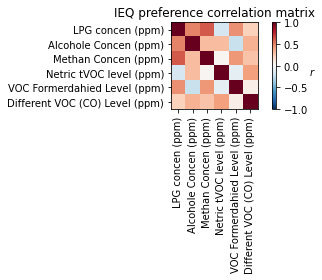

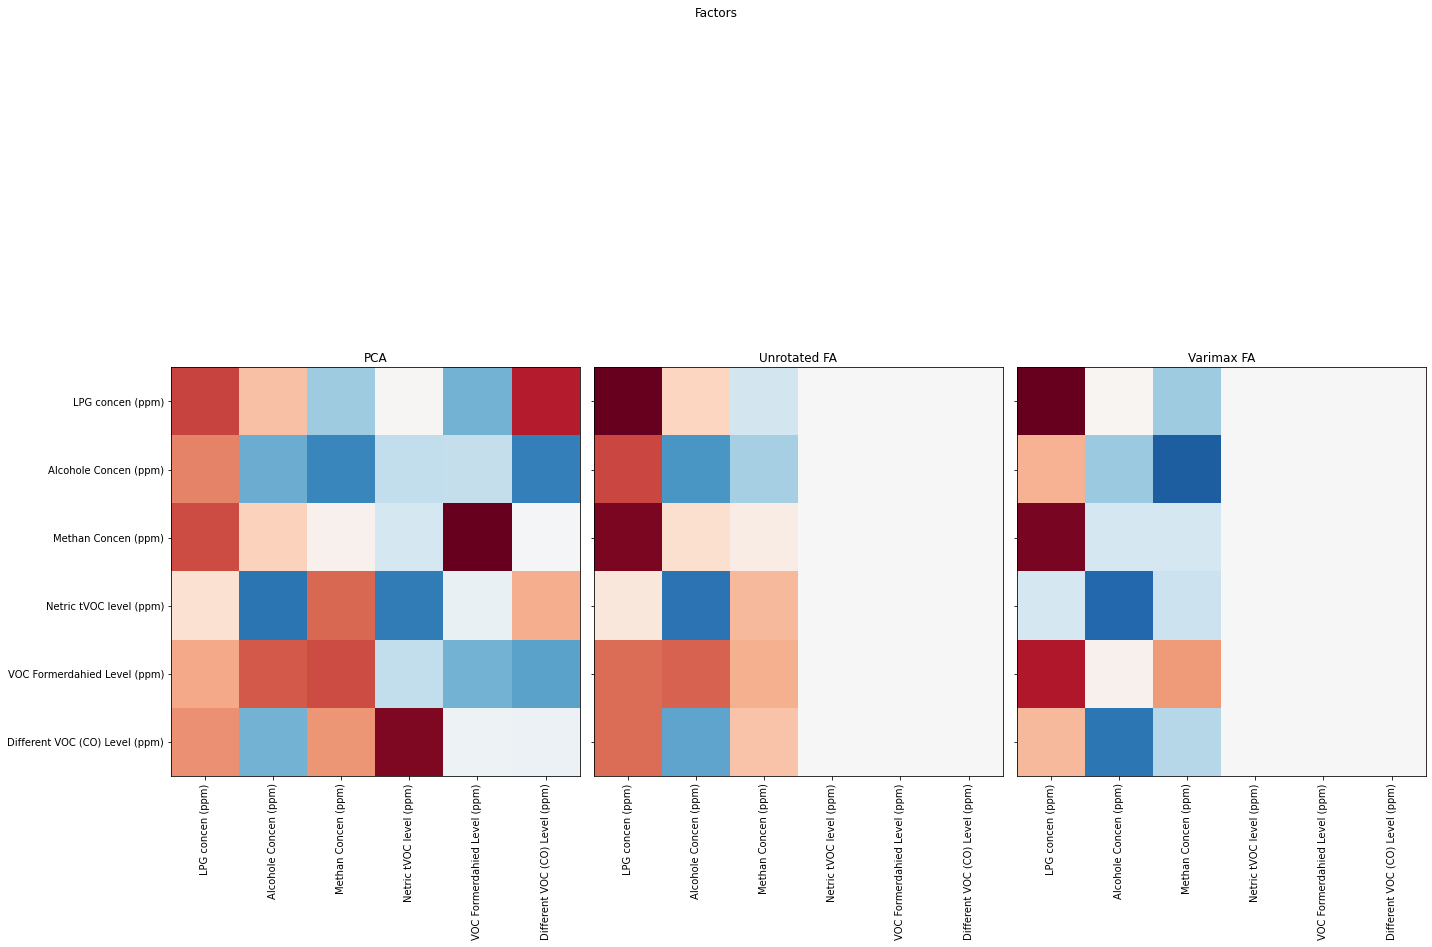

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as alg

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = pd.read_excel (r'C:\Users\vision\Dropbox\ROS\Arch_Plans_Paper\DataSheetsCleaned\all_Measured_Data.xlsx',sheet_name='all_Measured_Data')
df = pd.DataFrame(data, columns= ['LPG concen (ppm)',
                                  'Alcohole Concen (ppm)',
                                  'Methan Concen (ppm)',
                                  'Netric tVOC level (ppm)',
                                  'VOC Formerdahied Level (ppm)',
                                  'Different VOC (CO) Level (ppm)'])
feature_names = df.iloc[0].T
#print (df)
#df.head()
u, s, vh = alg.svd(df, full_matrices=True)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
pca = PCA(n_components=1)
pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca
             #, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['LPG concen (ppm)',
                'Alcohole Concen (ppm)',
                'Methan Concen (ppm)',
                'Netric tVOC level (ppm)',
                'VOC Formerdahied Level (ppm)',
                'Different VOC (CO) Level (ppm)']
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 6

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

